In [8]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

from Data_Preprocess import DataPreprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs


from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from umap import UMAP
import hdbscan

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


In [10]:
preprocessor = DataPreprocessing()
script_dir = os.path.dirname("4.0 UMAP+Kmeans_DBSCAN_HDBSCAN.ipynb")
data_path = os.path.join(script_dir,'..','..','Data', 'RawData.csv')
data = pd.read_csv(data_path,encoding='latin1').dropna()
data

,Unnamed: 0,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
1,2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
2,3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
3,4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
4,5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1991,-0.001158,3744.190299,4863.374473,8.792891,24.901362,40.390117,2903.201084,66.243082,122.882878,...,100.000000,57.399858,0,100.000000,41.244686,45.466296,0,30.171207,22.898173,100
1991,1992,-0.001147,3798.451896,4864.787808,8.814539,24.783557,40.401312,2911.912112,68.055534,122.881328,...,100.000000,57.365210,0,100.000000,41.463254,45.413515,0,30.066018,26.035429,100
1992,1993,-0.000370,3774.038558,4891.309364,8.659021,24.805757,40.107094,2922.391028,67.415723,122.888396,...,100.000000,57.415508,0,100.000000,41.700081,45.373462,0,30.117846,25.214501,100
1993,1994,-0.000925,3812.197101,4909.631048,8.724842,24.877275,40.463346,2931.150717,67.685917,122.890874,...,100.000000,57.280676,0,100.000000,41.954073,45.361655,0,29.900523,25.175145,100


# Data Preprocessing

In [4]:
train_validation1, test1 = train_test_split(data, train_size=0.7, test_size=0.3, random_state=60)
train1, validation1 = train_test_split(train_validation1,train_size=0.50, test_size=0.50, random_state=60)

In [5]:
Norm =MinMaxScaler()
train_data_normalized=pd.DataFrame(Norm.fit_transform(train1))
train_data_normalized

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.355958,0.328726,0.408750,0.207064,0.490620,0.845466,0.797197,0.591759,0.582244,0.357315,...,0.282689,0.186882,0.239253,0.442807,0.270104,0.312699,0.586708,0.802192,0.220639,0.0
1,0.356461,0.324748,0.331923,0.209968,0.482524,0.793793,0.802452,0.591172,0.439225,0.470139,...,0.257129,0.194986,0.239734,0.449300,0.266481,0.308842,0.575837,0.798846,0.258838,0.0
2,0.939165,0.514701,0.626472,0.289152,0.439571,0.874489,0.859111,0.459418,0.264201,0.258824,...,0.482457,0.261674,0.385043,0.369181,0.002788,0.502196,0.821106,0.875201,0.209401,0.0
3,0.143791,0.395694,0.481297,0.315416,0.558091,0.831131,0.834982,0.597232,0.489475,0.786263,...,0.415332,0.271859,0.290831,0.534746,0.490836,0.239708,0.477426,0.855604,0.283583,0.0
4,0.442433,0.344934,0.484010,0.219479,0.430941,0.864238,0.767037,0.593241,0.433918,0.468604,...,0.337706,0.166890,0.252732,0.439919,0.265409,0.321680,0.580468,0.805971,0.193795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,0.298140,0.342642,0.411370,0.215847,0.381709,0.833219,0.782444,0.594326,0.445553,0.301980,...,0.326245,0.174080,0.250862,0.472795,0.242606,0.322343,0.586928,0.808195,0.308949,0.0
694,0.563600,0.480092,0.263863,0.321343,0.337235,0.669470,0.644931,0.372241,0.841499,0.533924,...,0.149403,0.283676,0.359569,0.380929,0.059550,0.144638,0.260809,0.886227,0.203143,0.0
695,0.153846,0.388949,0.524246,0.435685,0.578571,0.821739,0.817203,0.595837,0.465321,0.263315,...,0.348444,0.309588,0.289374,0.577012,0.482787,0.235940,0.498971,0.818301,0.002359,0.0
696,0.275013,0.336868,0.468397,0.190055,0.524084,0.813964,0.801273,0.597924,0.605717,0.487311,...,0.306706,0.179245,0.247836,0.469954,0.256132,0.324797,0.574233,0.798904,0.394000,0.0


## Dimensionality Reduction: UMAP

Text(0.5, 1.0, 'UMAP')

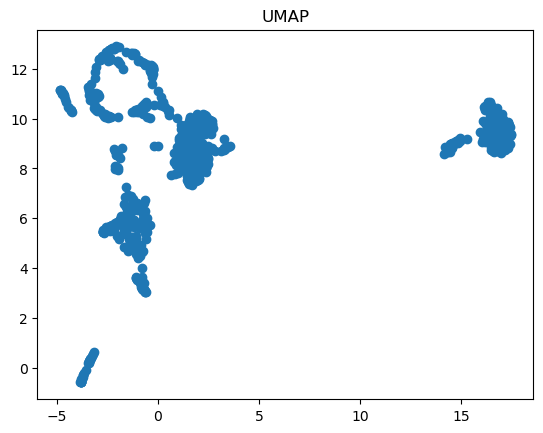

In [7]:
UMAP_normal = UMAP (n_components= 2)
df_UMAP_normal = UMAP_normal.fit_transform(train_data_normalized)
plt.scatter(df_UMAP_normal[:,0], df_UMAP_normal[:,1])
plt.title("UMAP")

### Clustering 1: DBSCAN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


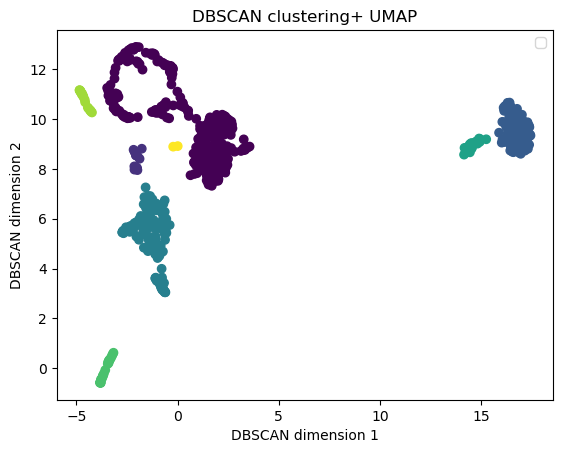

In [8]:
# Clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)# Best combination achieved. It's fun to play with them
clusters = dbscan.fit_predict(df_UMAP_normal)

plt.scatter(df_UMAP_normal[:, 0], df_UMAP_normal[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN clustering+ UMAP')
plt.xlabel("DBSCAN dimension 1")
plt.ylabel("DBSCAN dimension 2")
plt.legend()
plt.show()

## Cluster evaluation

In [9]:
# Silhouette Coefficient: The best value is 1 and the worst value is -1.
score = silhouette_score(df_UMAP_normal,clusters,metric='euclidean')
print(score)

0.19222774


In [10]:
#Davies - Bouldin Index: The minimum score is zero, with lower values indicating better clustering.
db_index = davies_bouldin_score(df_UMAP_normal,clusters)
db_index

0.9806612555249282

### Clustering 2: HDBSCAN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


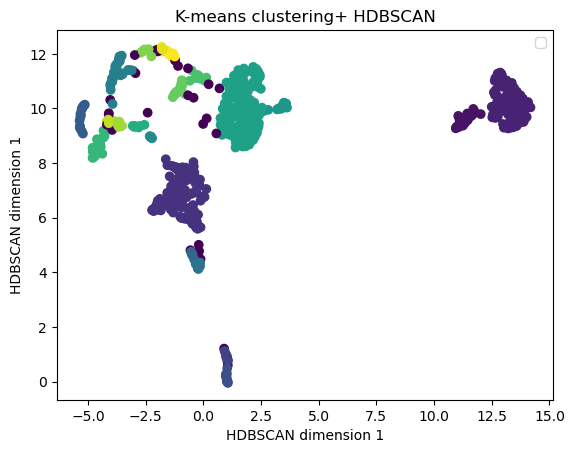

In [44]:
# Clustering
HD = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
cluster_labels = HD.fit_predict(df_UMAP_normal)

plt.scatter(df_UMAP_normal[:, 0], df_UMAP_normal[:, 1], c=cluster_labels, cmap='viridis')
plt.title('HDBSCAN clustering+ UMAP')
plt.xlabel("HDBSCAN dimension 1")
plt.ylabel("HDBSCAN dimension 1")
plt.legend()
plt.show()

## Cluster evaluation

In [46]:
# Silhouette Coefficient: The best value is 1 and the worst value is -1.
score = silhouette_score(df_UMAP_normal,cluster_labels,metric='euclidean')
print(score)

0.44077447


In [47]:
#Davies - Bouldin Index: The minimum score is zero, with lower values indicating better clustering.
db_index = davies_bouldin_score(df_UMAP_normal,cluster_labels)
db_index

1.262744358396782

### Clustering 3: KMeans   

c:\Users\gabi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


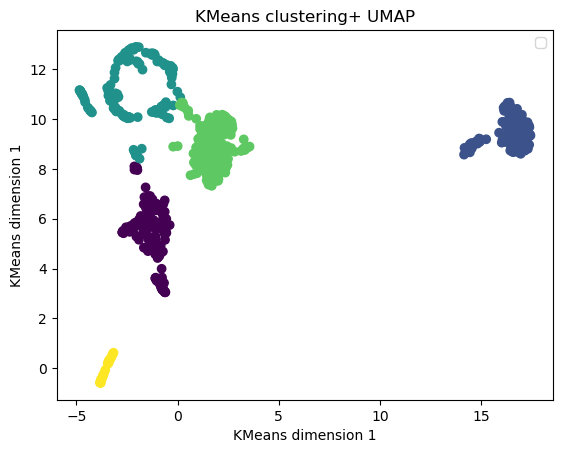

In [11]:
# Instantiate KMeans object
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit and predict clusters
y_kmeans = kmeans.fit_predict(df_UMAP_normal)
(y_kmeans ==1).sum()

plt.scatter(df_UMAP_normal[:, 0], df_UMAP_normal[:, 1], c=y_kmeans, cmap='viridis')
plt.title('KMeans clustering+ UMAP')
plt.xlabel("KMeans dimension 1")
plt.ylabel("KMeans dimension 1")
plt.legend()
plt.show()

### Cluster evaluation

In [12]:
# Silhouette Coefficient: The best value is 1 and the worst value is -1.
score = silhouette_score(df_UMAP_normal,y_kmeans,metric='euclidean')
print(score)

0.6861606


In [13]:
#Davies - Bouldin Index: The minimum score is zero, with lower values indicating better clustering.
db_index = davies_bouldin_score(df_UMAP_normal,y_kmeans)
db_index

0.40527541856971333